# Introduction
This dataset contains 9,538 medical records related to diabetes diagnosis and risk factors. It includes various health parameters, lifestyle habits, and genetic predispositions that contribute to diabetes risk. The data is structured with realistic distributions, making it valuable for medical research, statistical analysis, and machine learning applications.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist


import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv("diabetes_dataset.csv")
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [17]:
missing_values = df.isnull().sum()
missing_values

Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64

In [18]:
df.fillna(df.median(), inplace=True)

In [19]:
df = df.convert_dtypes()

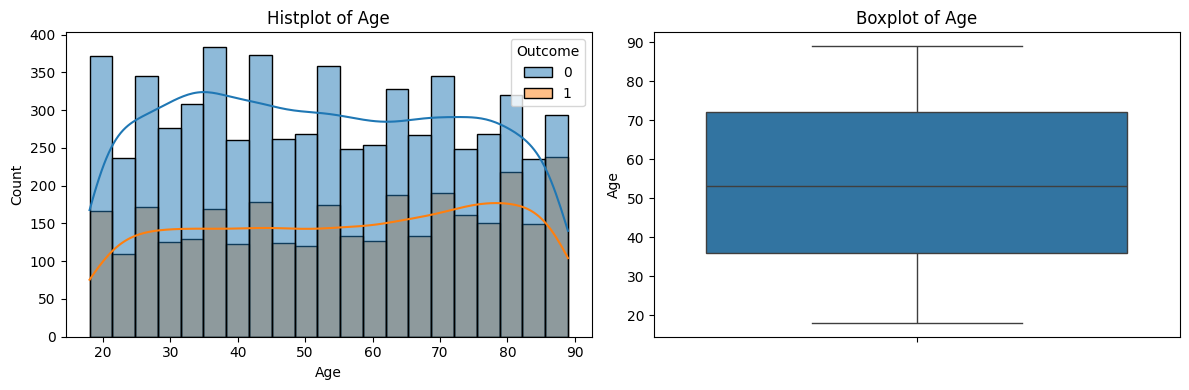

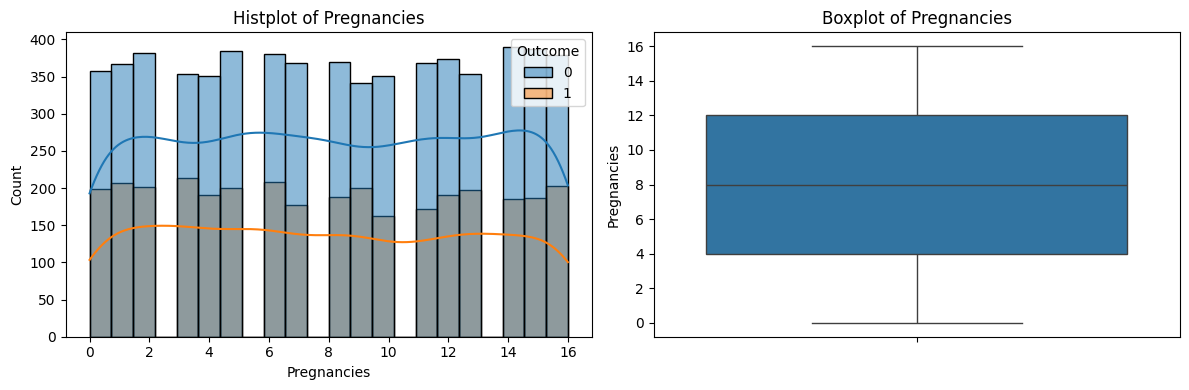

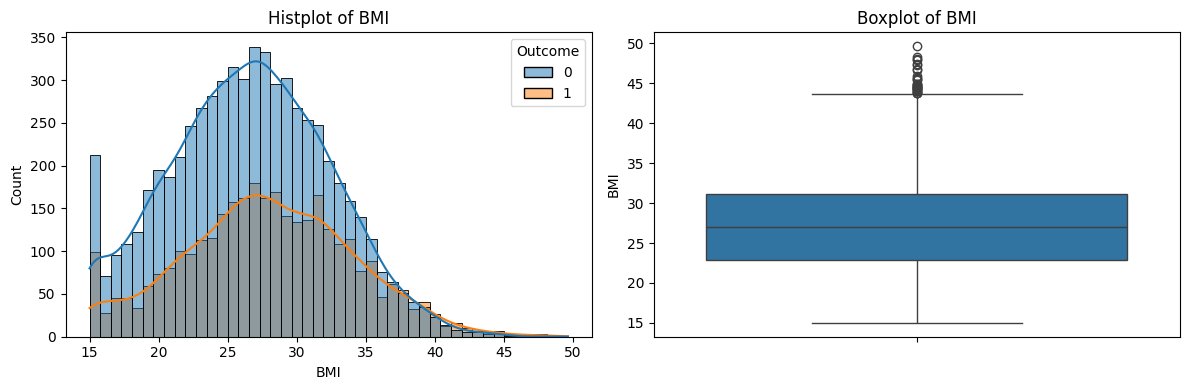

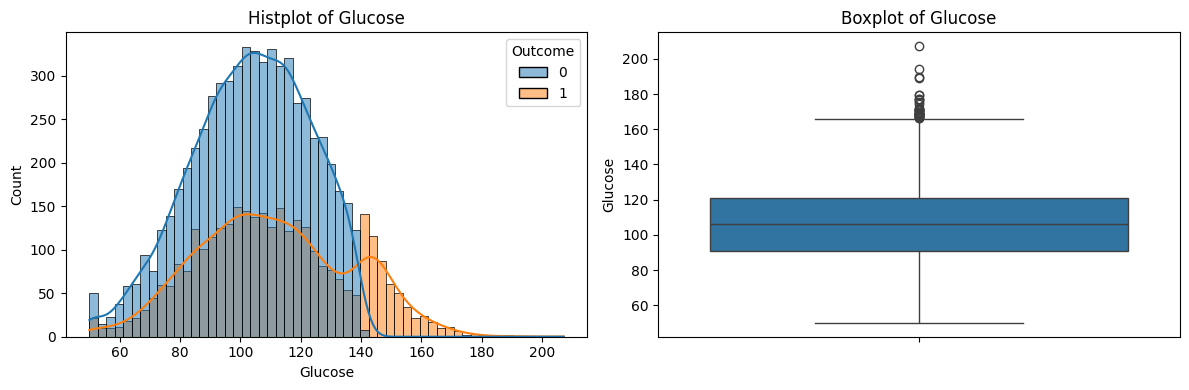

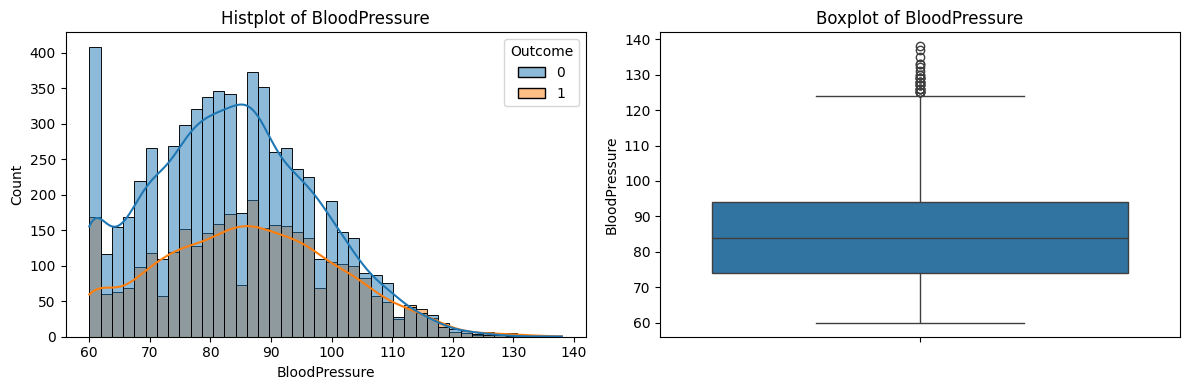

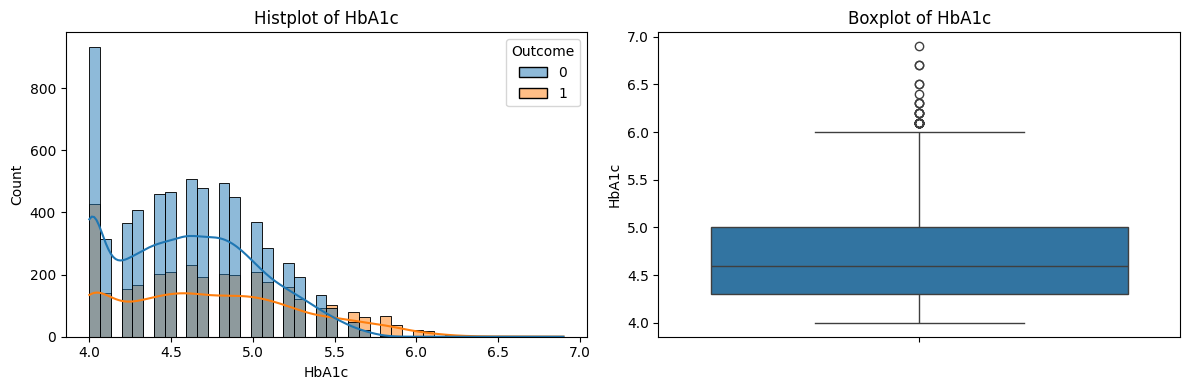

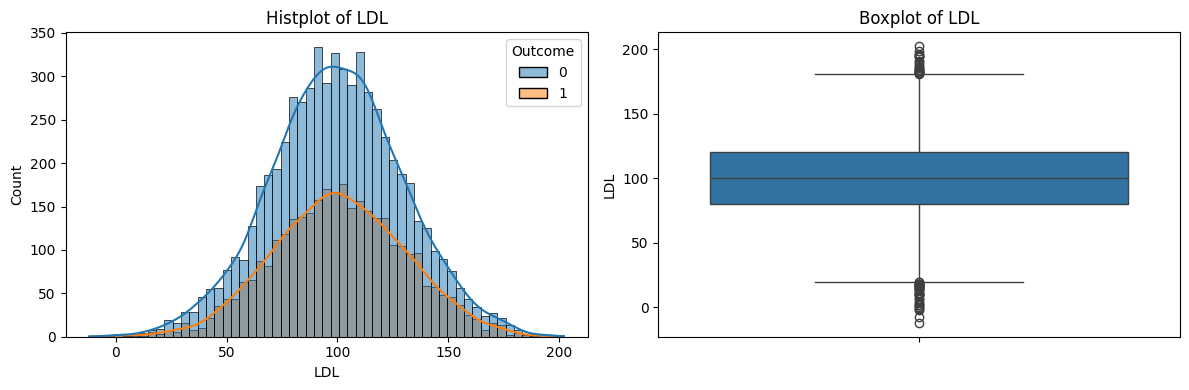

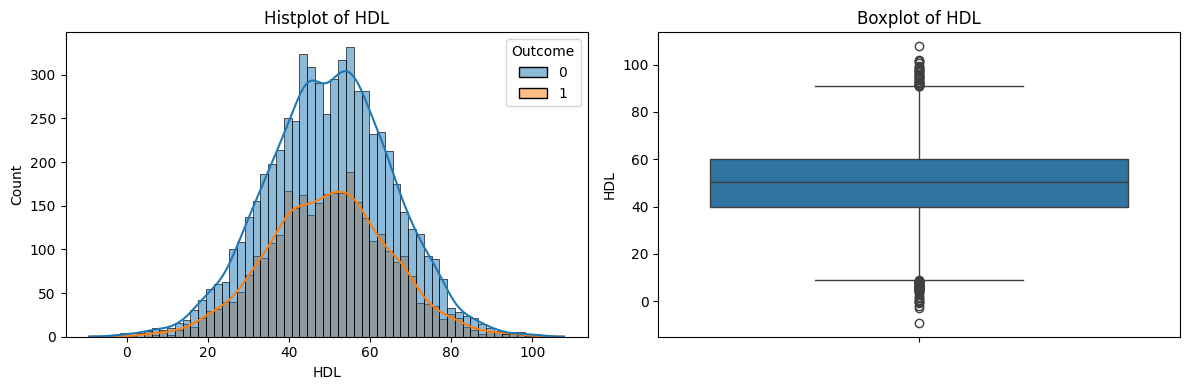

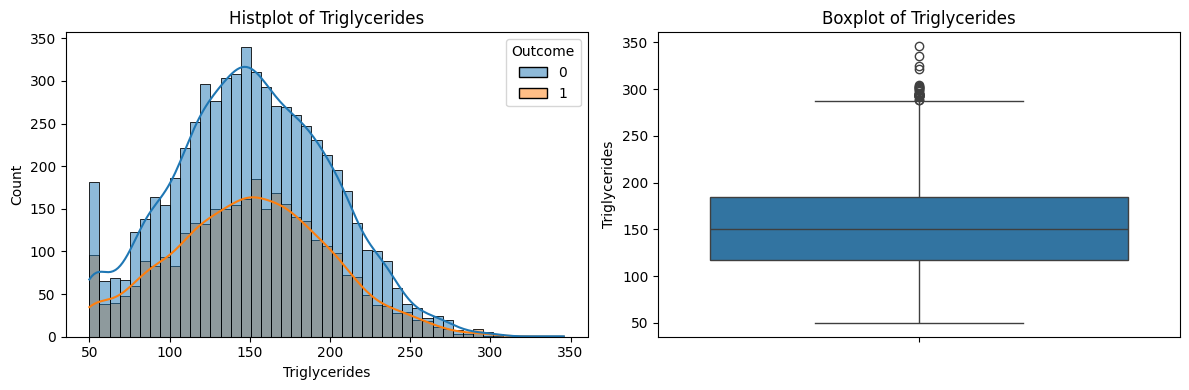

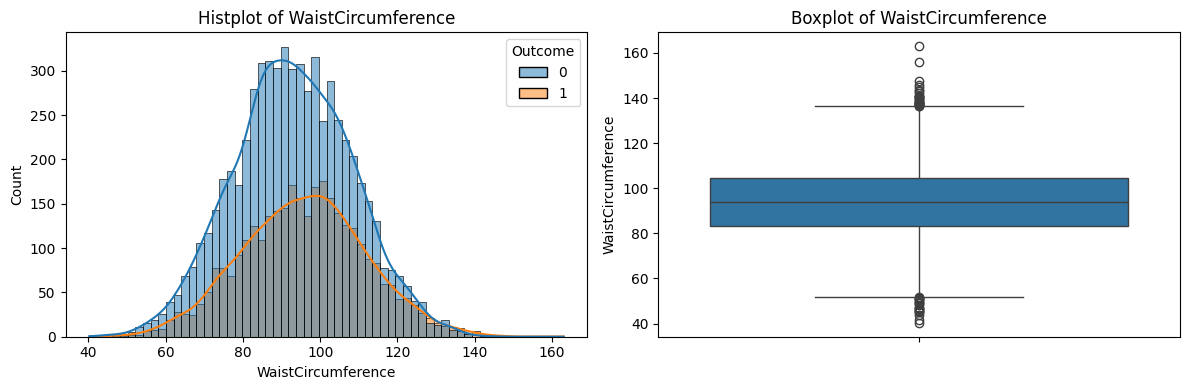

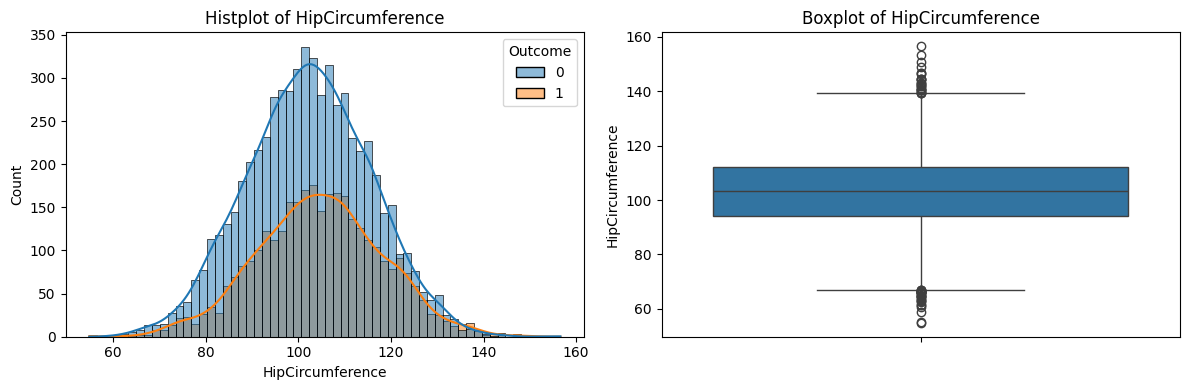

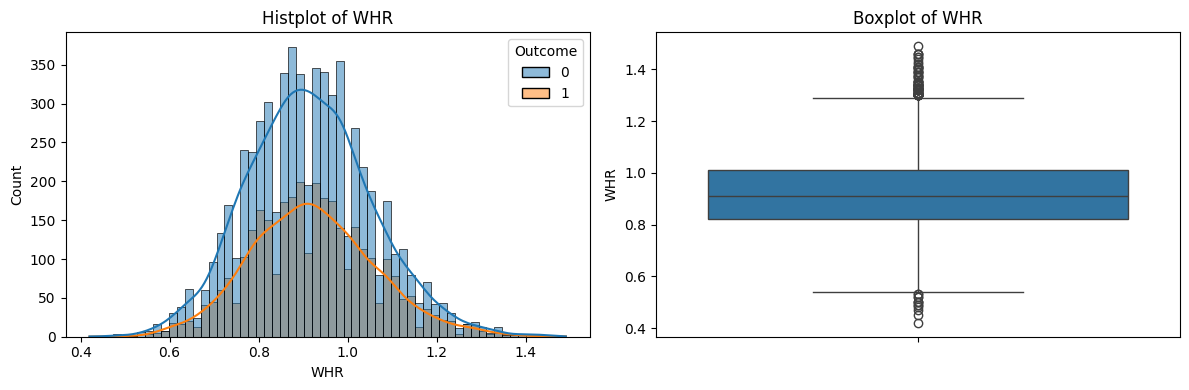

In [20]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols=["FamilyHistory", "DietType", "Hypertension", "MedicationUse"]
for col in cat_cols:
    num_cols.remove(col)
for col in num_cols[:-1]:
    fig, axes=plt.subplots(1,2, figsize=(12,4))
    sns.histplot(x=col, data=df, kde=True, ax=axes[0], hue='Outcome')
    sns.boxplot(df[col], ax=axes[1])
    axes[0].set_title(f"Histplot of {col}")
    axes[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [22]:
basic_stats = df.describe()
basic_stats

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0,9538.0
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.9174,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.91859,14.12348,0.476395,29.91191,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.49092,0.475098
min,18.0,0.0,15.0,50.0,60.0,4.0,-12.0,-9.2,50.0,40.3,54.8,0.42,0.0,0.0,0.0,0.0,0.0
25%,36.0,4.0,22.87,91.0,74.0,4.3,80.1,39.7,117.2,83.4,94.0,0.82,0.0,0.0,0.0,0.0,0.0
50%,53.0,8.0,27.05,106.0,84.0,4.6,99.9,50.2,150.55,93.8,103.2,0.91,0.0,0.0,0.0,0.0,0.0
75%,72.0,12.0,31.18,121.0,94.0,5.0,120.2,60.2,185.1,104.6,112.1,1.01,1.0,1.0,0.0,1.0,1.0
max,89.0,16.0,49.66,207.2,138.0,6.9,202.2,107.8,345.8,163.0,156.6,1.49,1.0,2.0,1.0,1.0,1.0


In [23]:
correlation_matrix = df.corr(numeric_only = True)

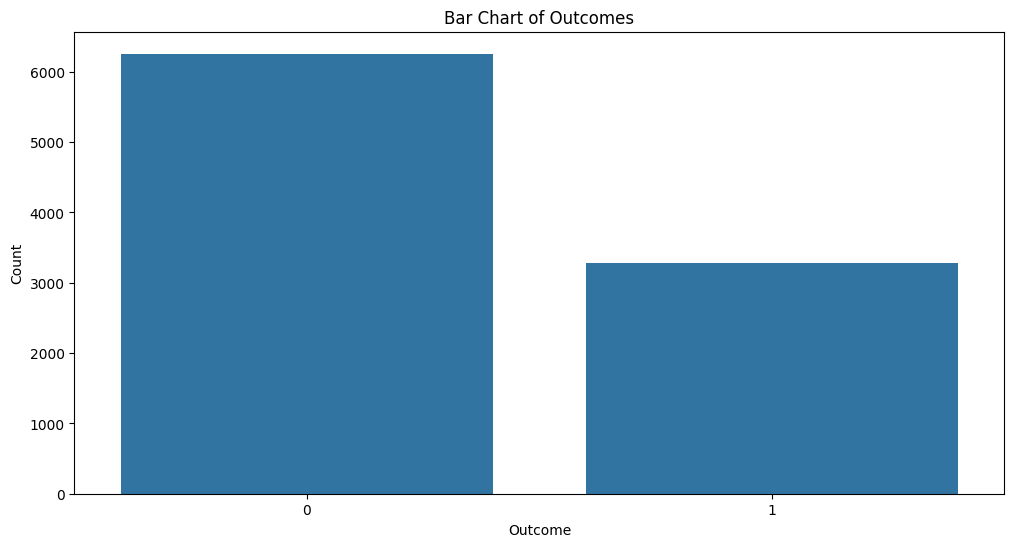

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Bar Chart of Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

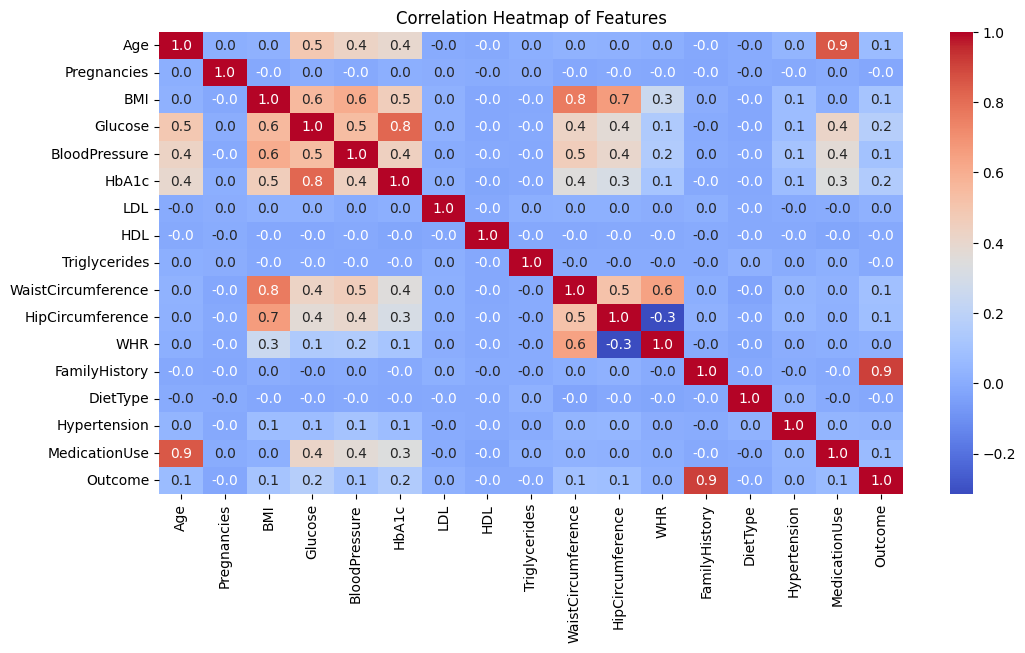

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

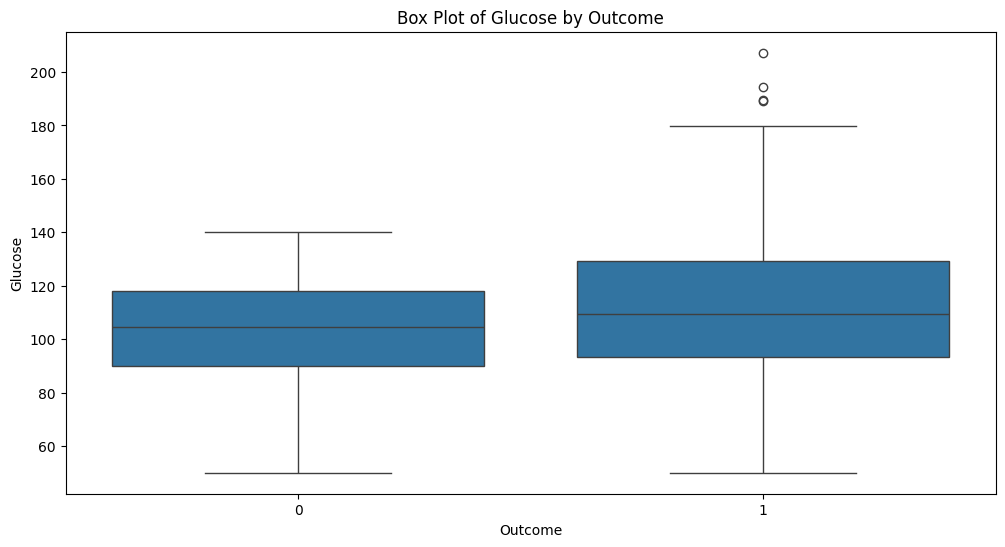

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Box Plot of Glucose by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()